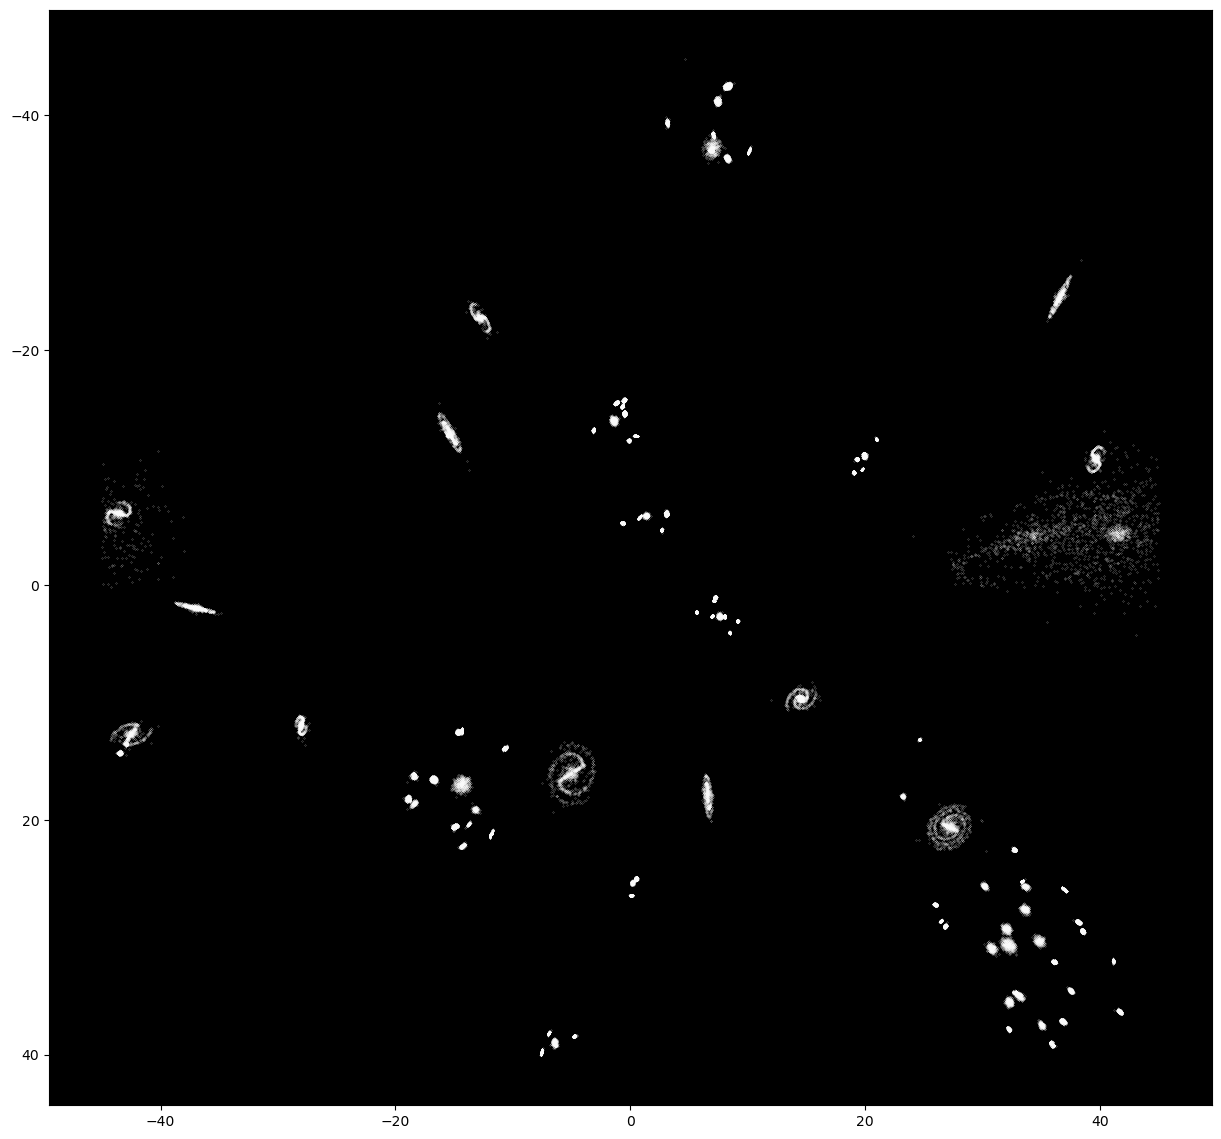

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

datapath = 'universe_8/' # all of the data is within a folder in this .ipynb file's directory
stardata = pd.read_csv(datapath + '/combined_stars.csv')    # read the data from the .txt file into a dataframe

equats = stardata['X']    # get the equatorial positions of all of the stars
polars = stardata['Y']     # get the polar positions of all of the stars
parallax = stardata['Parallax']    # get the parallax of the stars

# now we need the indexes of stars with small/no parallax angles - distant stars!
indexes = [i for i, x in enumerate(parallax) if x <= 0.007] # this is a distance of about ~150pc
# now to populate new lists with all of the equatorial/polar angles of stars that litte/no some parallax
equats = [equats[i] for i in indexes]  
polars = [polars[i] for i in indexes]

# now lets plot these distant stars!
fig = plt.figure(figsize=(15, 15))   # make a figure to plot stuff on
ax = fig.add_subplot(1, 1, 1)    # and add an axis so we can plot stuff on the figure
ax.scatter(equats, polars, s=0.02, c='w')  # plot small-ish dots, all white in colour

ax.invert_yaxis()  # the data is set up so that polar angle of 0 is at the top, so we need to flip the axis
ax.set_facecolor('k')   # space has a black background, duh
ax.set_aspect(1)    # makes it so that the figure is twice as wide as it is tall - no stretching!
plt.show()   # now, finally show the figure

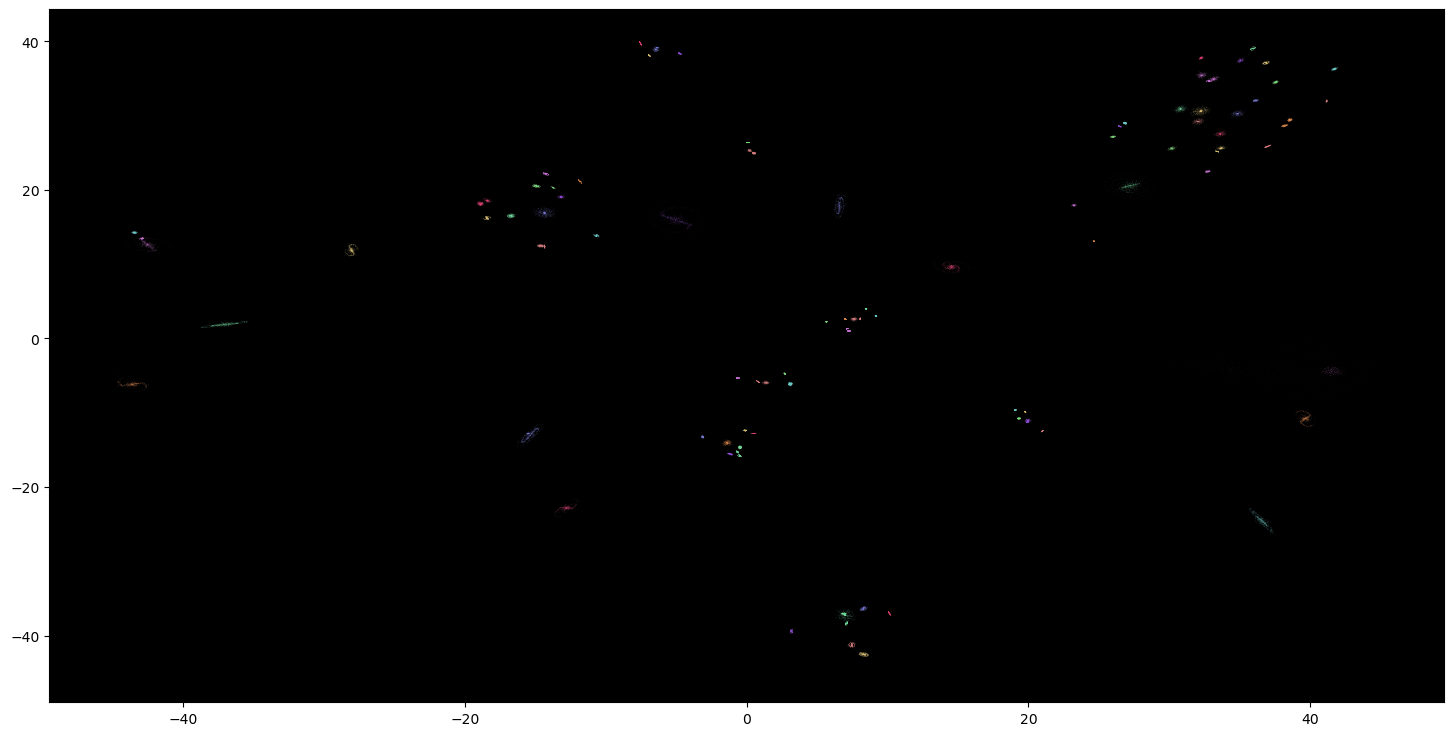

In [8]:
from sklearn import cluster
import numpy as np

# first, lets define the points for clustering in a suitable format. the clustering algorithm needs 'n' points, 
# where each point has a coordinate [x, y]. So our final array should look like: array = [[x1,y1], [x2,y2], ...]
coords = np.ndarray((len(equats), 2))  # set up an empty array of the correct length and dimension (Nx2)
for i, equat in enumerate(equats):
    coords[i] = [equat, polars[i]] # populate each element of the array with [x, y]

# now let's cluster the data. I won't get into too much detail, but if you want to know why I chose these
# parameters, I'd suggest looking up the documentation and cross-referencing these values against the param descriptions
clustering = cluster.DBSCAN(eps=0.3, min_samples=40, n_jobs=-1).fit(coords)

# now let's define some colours to display the different clusters in. 
colours = ['#ffe396', '#ffa1a1', '#a2ffa1', '#91f2ef', '#f196ff',
          '#ffa96b', '#94ffbf', '#9c9fff', '#ff6390', '#b570ff']

# the labels in this context correspond to which cluster it is. For n clusters, there will be n distinct labels which
# are all integers: 0, 1, 2, ..., n. Each point in 'coords' will have a label (and hence a cluster) assigned to it
labels = clustering.labels_ 

fig, ax = plt.subplots(figsize=(18, 9))   # now let's plot the clustering to see how we've done

for clust in range(0, max(labels) + 1):
    # want to go to max(labels) + 1, since labels starts at 0 & goes up to n, and range() starts at 0 & goes to n-1
    colour = colours[clust%len(colours)] # cycle through the colours
    Xk = coords[labels == clust] # get the 
    ax.scatter(Xk[:, 0], Xk[:, 1], alpha=0.8, c=colour, s=0.02, linewidths=0)
    
# the next scatter call plots white points for the stars that werent assigned to galaxies
ax.scatter(coords[labels == -1, 0], coords[labels == -1, 1], c="w", alpha=0.3, s=0.02, linewidths=0) 


ax.set_facecolor('k')
#fig.savefig('dbscan.png', dpi=1500) # i want to save this so that I can zoom in!
plt.show()

In [30]:
import os
directory = os.path.abspath("") + f"\\{datapath}"
newdir = directory + "\\Star Clusters"
if not os.path.exists(newdir):
    os.makedirs(newdir)

for clust in range(0, max(labels) + 1):
    indices = np.where(labels == clust)  # gets the indices of this galaxy's stars with respect to the stardata struct
    data = stardata.iloc[indices] # find the stars corresponding to the found indices
    
    Xk = coords[labels == clust] # get the positions of all of the stars in the galaxy
    xcenter = np.mean(Xk[:, 0]); ycenter = np.mean(Xk[:, 1]) # rough center points of each galaxy
    
    # now, I want to name the clusters like "X{equat}-Y{polar}-N{population}":
    clustername = 'Cheese'+"%05.1f"%xcenter +'Pizza'+"%05.1f"%ycenter+'Galaxy' # generates cluster name
    # finally, write the data to a file defined by clustername
    data.to_csv(datapath + f'/Star Clusters/{clustername}.csv', index=None, sep=' ')    

In [22]:
positions = np.ndarray((max(labels), 3))
print(positions)
names = np.ndarray((max(labels)), dtype=object)

for clust in range(0, max(labels)):
    indices = np.where(labels == clust)  # gets the indices of this galaxy's stars with respect to the stardata struct
    data = stardata.iloc[indices] # find the stars corresponding to the found indices
    
    Xk = coords[labels == clust] # get the positions of all of the stars in the galaxy
    xcenter = np.mean(Xk[:, 0]); ycenter = np.mean(Xk[:, 1]) # rough center points of each galaxy
    meanvel = np.mean(data['RadialVelocity']) # get the mean velocity of the stars within the galaxy
    positions[clust] = [xcenter, ycenter, meanvel]
    # now, I want to name the clusters like "X{equat}-Y{polar}-N{population}":
    clustername = 'X'+"%05.1f"%xcenter +'-Y'+"%05.1f"%ycenter+'-N'+str(len(Xk)) # generates cluster name
    names[clust] = clustername

[[ 3.21877537e+01  3.06622456e+01 -1.09757525e+02]
 [ 3.20146954e+01  2.92872085e+01 -1.12827155e+02]
 [ 3.75081868e+01  3.45593270e+01 -1.13124581e+02]
 [ 2.68197119e+01  2.90611928e+01 -1.14637227e+02]
 [ 3.27130302e+01  3.50867537e+01 -1.11330864e+02]
 [ 3.81474742e+01  2.87058390e+01 -1.12978406e+02]
 [ 3.58959055e+01  3.91042851e+01 -1.13409924e+02]
 [ 3.48070276e+01  3.03184333e+01 -1.09887213e+02]
 [ 3.22247411e+01  3.78224552e+01 -1.16735675e+02]
 [ 3.50133194e+01  3.74859639e+01 -1.15152757e+02]
 [ 3.34890615e+01  2.54554042e+01 -1.13951284e+02]
 [ 4.11250108e+01  3.20214095e+01 -1.13432588e+02]
 [ 3.01399486e+01  2.56438972e+01 -1.12442119e+02]
 [ 4.16759090e+01  3.63411604e+01 -1.07949216e+02]
 [ 3.26854284e+01  2.25473707e+01 -1.09229203e+02]
 [ 3.85238868e+01  2.94878062e+01 -1.13241527e+02]
 [ 3.07558262e+01  3.09468159e+01 -1.11356310e+02]
 [ 3.60876452e+01  3.20990605e+01 -1.14505390e+02]
 [ 3.35871922e+01  2.76116140e+01 -1.10485931e+02]
 [ 2.64423627e+01  2.86212000e+

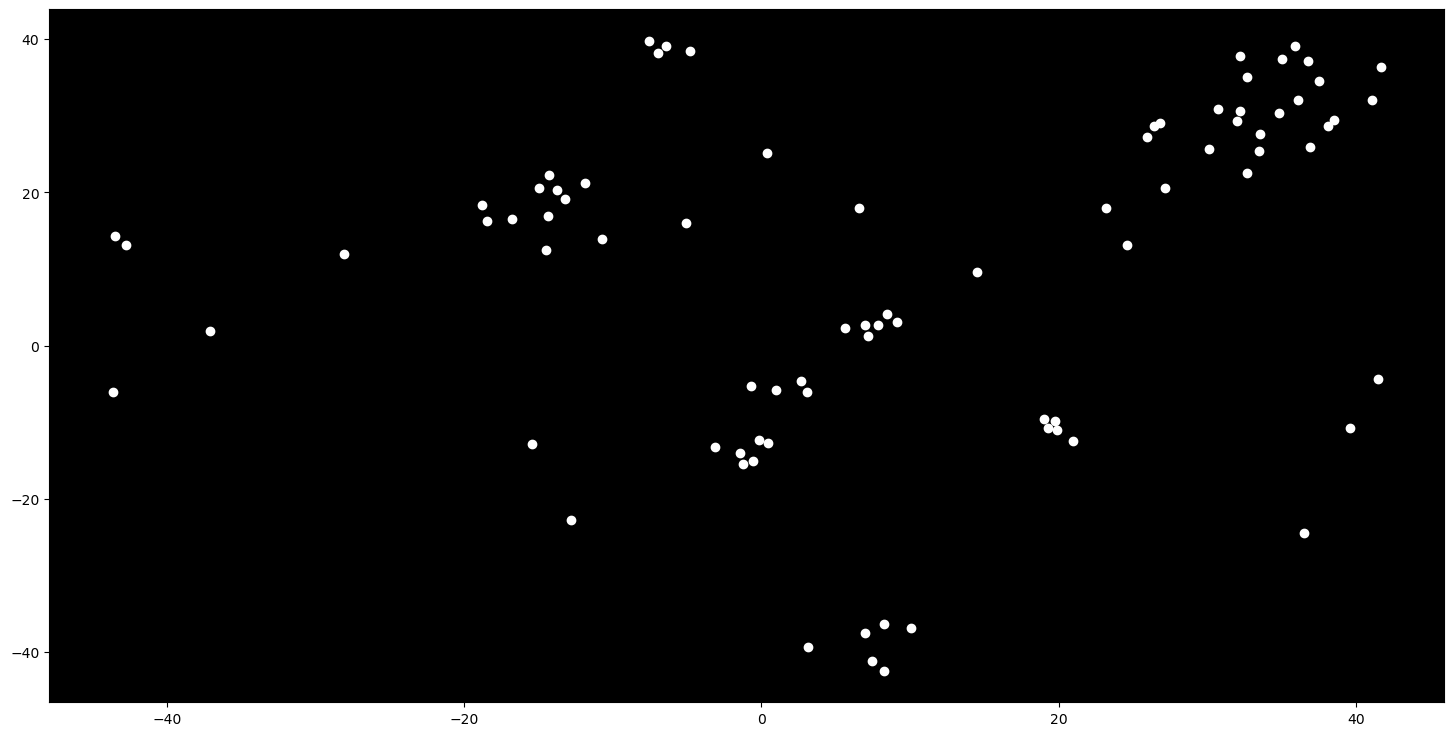

In [23]:
fig, ax = plt.subplots(figsize=(18, 9))
ax.scatter(positions[:, 0], positions[:, 1], c='w')

ax.set_facecolor('k')


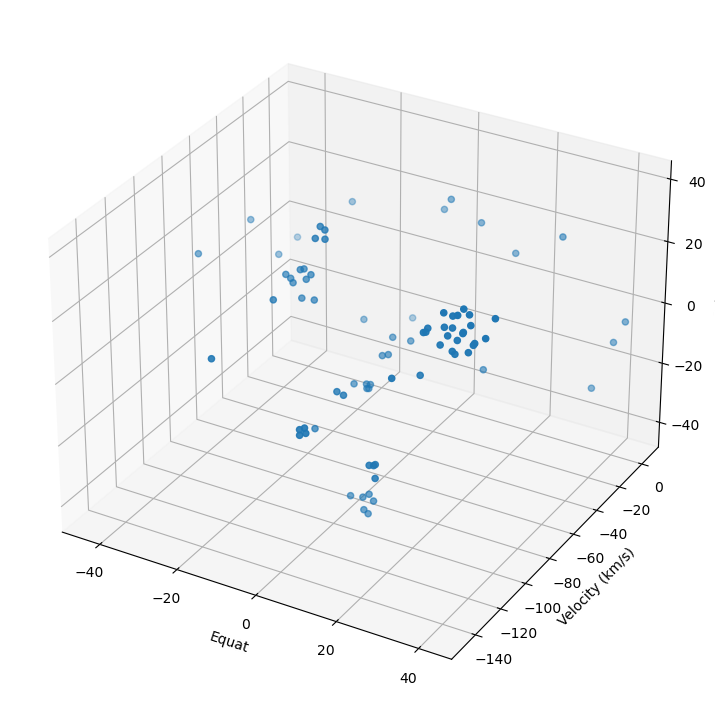

In [24]:
fig = plt.figure(figsize=(18, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(positions[:, 0], positions[:, 2], positions[:, 1])
ax.set_xlabel("Equat"); ax.set_zlabel("Polar"); ax.set_ylabel("Velocity (km/s)");

IndexError: boolean index did not match indexed array along dimension 0; dimension is 82 but corresponding boolean dimension is 55015

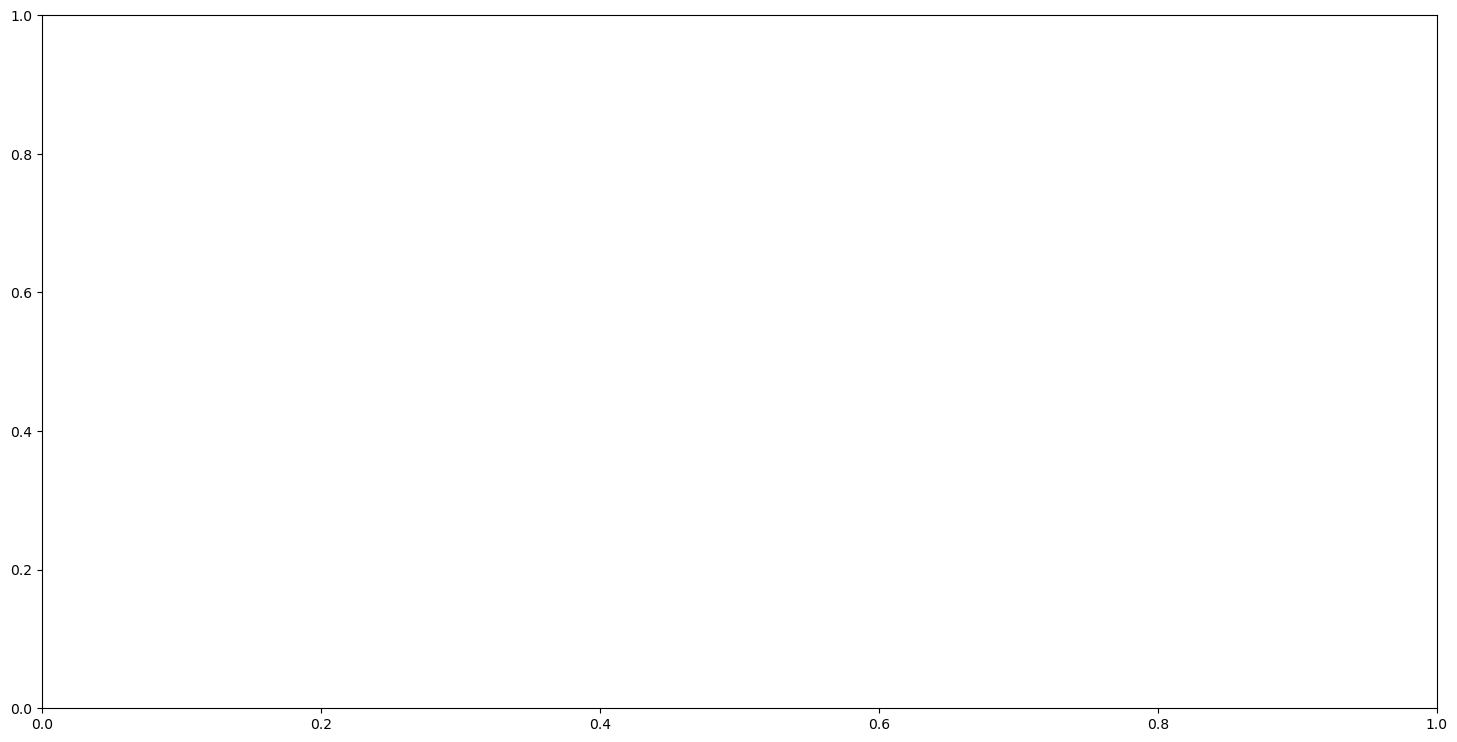

In [26]:
fig, ax = plt.subplots(figsize=(18, 9))

for clust in range(0, max(labels) + 1):
    colour = colours[clust%len(colours)]
    Xk = positions[labels == clust]
    ax.scatter(Xk[:, 0], Xk[:, 1], alpha=0.8, c=colour, s=4, linewidths=0)
    
ax.scatter(positions[labels == -1, 0], positions[labels == -1, 1], s=4, c='w', linewidths=0)

#fig.savefig('hdbscanClose.png', dpi=1500)
plt.show()

In [27]:
newdir = directory + "\\Close Galaxy Clusters"
if not os.path.exists(newdir):
    os.makedirs(newdir)
    
for clust in range(0, max(labels) + 1):
    Xk = positions[labels == clust] # get the positions of all of the galaxies in the cluster
    xcenter = np.mean(Xk[:, 0]); ycenter = np.mean(Xk[:, 1]) # rough center points of each galaxy
    
    # now, I want to name the clusters like "GC-X{equat}-Y{polar}-N{population}":
    clustername = 'GC-X'+"%05.1f"%xcenter +'-Y'+"%05.1f"%ycenter+'-N'+str(len(Xk)) # generates cluster name
    galaxnames = names[labels == clust] # get the names of the galaxies within this cluster
    # finally, write the data to a file defined by clustername
    with open(datapath + f'/Close Galaxy Clusters/{clustername}.txt', 'w') as file: # open/create this file...
        for name in galaxnames: # for each galaxy in the cluster...
            file.write(str(name)+'\n') # ...write the galaxy name, and then end the line

IndexError: boolean index did not match indexed array along dimension 0; dimension is 82 but corresponding boolean dimension is 55015

In [ ]:
distantdata = pd.read_csv(datapath + '/Distant Galaxy Data.csv', delimiter=' ')

distantequats = distantdata['Equatorial']    # get the equatorial positions of all of the distant galaxies
distantpolars = distantdata['Polar']     # get the polar positions of all of the distant galaxies

# now lets plot these distant stars!
fig, ax = plt.subplots(figsize=(18, 9))
ax.scatter(distantequats, distantpolars, s=0.02, c='w')
ax.set_facecolor('k')
plt.show()   # now, finally show the figure